In [ ]:

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten,Input,BatchNormalization,GlobalMaxPooling2D
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.models import Model
from keras.utils import np_utils
from keras.datasets import cifar10
import matplotlib.pyplot as plt

In [ ]:
(train_X,train_Y),(test_X,test_Y)=cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


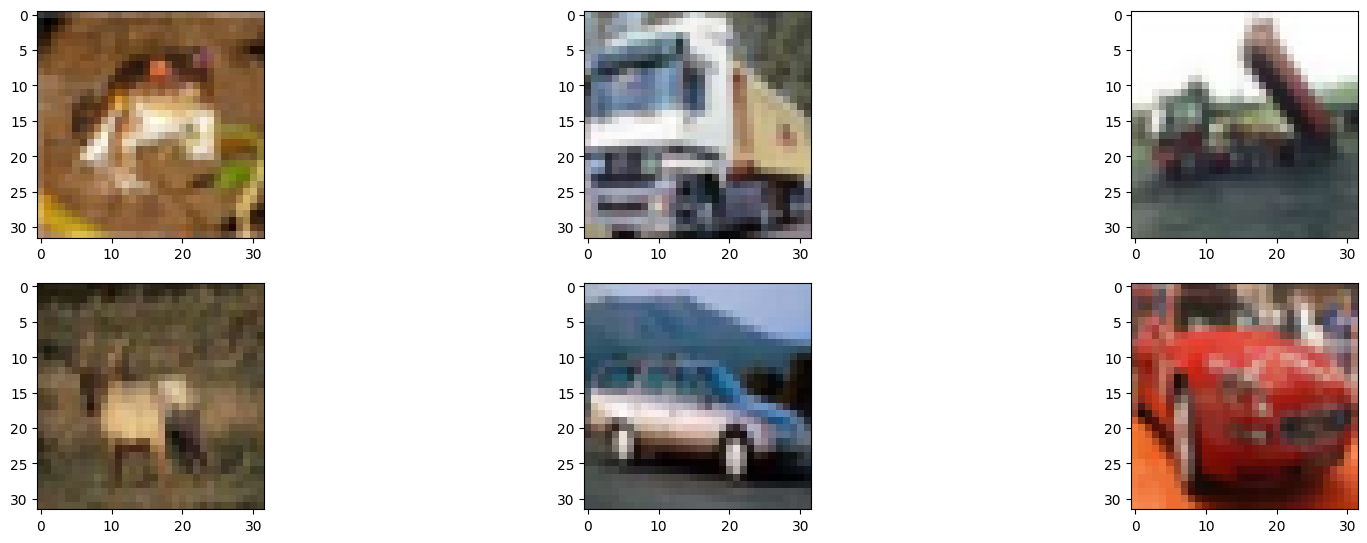

In [ ]:
n=6
plt.figure(figsize=(20,10))
for i in range(n):
  plt.subplot(330+1+i)
  plt.imshow(train_X[i])
plt.show()

In [ ]:
train_x=train_X.astype('float32')
test_X=test_X.astype('float32')

train_X=train_X/255.0
test_X=test_X/255.0

In [ ]:
train_Y=np_utils.to_categorical(train_Y)
test_Y=np_utils.to_categorical(test_Y)

num_classes=test_Y.shape[1]

In [ ]:

i = Input(shape=train_X[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(num_classes, activation='softmax')(x)

model = Model(i, x)

# model description
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0     

In [ ]:

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:

# Fit with data augmentation
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
  width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

train_generator = data_generator.flow(train_X, train_Y, batch_size)
steps_per_epoch = train_X.shape[0] // batch_size

r = model.fit(train_generator, validation_data=(test_X, test_Y),
              steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 40s 26ms/step - loss: 0.1785 - accuracy: 0.9381 - val_loss: 0.4041 - val_accuracy: 0.8812
Epoch 2/50
1562/1562 [==============================] - 42s 27ms/step - loss: 0.1774 - accuracy: 0.9389 - val_loss: 0.4328 - val_accuracy: 0.8742
Epoch 3/50
1562/1562 [==============================] - 40s 25ms/step - loss: 0.1760 - accuracy: 0.9397 - val_loss: 0.4210 - val_accuracy: 0.8770
Epoch 4/50
1562/1562 [==============================] - 40s 26ms/step - loss: 0.1761 - accuracy: 0.9388 - val_loss: 0.4408 - val_accuracy: 0.8783
Epoch 5/50
1562/1562 [==============================] - 36s 23ms/step - loss: 0.1703 - accuracy: 0.9408 - val_loss: 0.3961 - val_accuracy: 0.8852
Epoch 6/50
1562/1562 [==============================] - 37s 24ms/step - loss: 0.1696 - accuracy: 0.9410 - val_loss: 0.4102 - val_accuracy: 0.8746
Epoch 7/50
1562/1562 [==============================] - 37s 24ms/step - loss: 0.1674 - accuracy: 0.9429 - val_loss: 0.4189 -

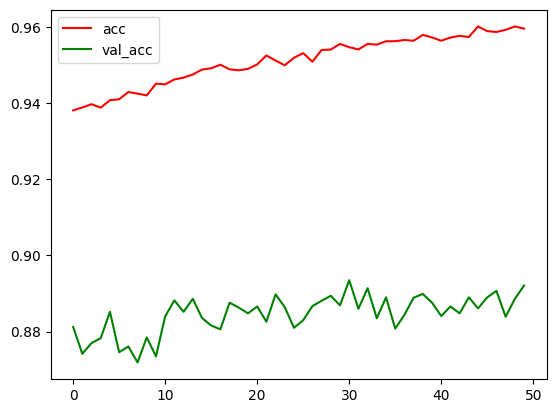

In [ ]:

plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

In [ ]:
_,acc=model.evaluate(test_X,test_Y)
print(acc*100)

313/313 [==============================] - 1s 4ms/step - loss: 0.4469 - accuracy: 0.8921
89.20999765396118


In [ ]:
test_Y[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

1/1 [==============================] - 0s 28ms/step
Original label is bird and predicted label is bird


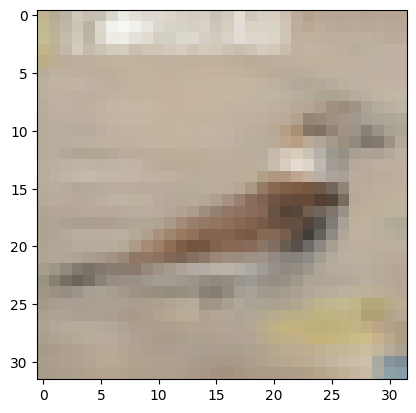

In [ ]:

labels = '''airplane automobile bird cat deer dog frog horse ship truck'''.split()

# select the image from our test dataset
image_number = 70

# display the image
plt.imshow(test_X[image_number])

# load the image in an array
n = np.array(test_X[image_number])

# reshape it
p = n.reshape(1, 32, 32, 3)

# pass in the network for prediction and
# save the predicted label
predicted_label = labels[model.predict(p).argmax()]

# load the original label
Y=np.array(test_Y)
original_label = labels[Y[image_number].argmax()]

# display the result
print("Original label is {} and predicted label is {}".format(
    original_label, predicted_label))

In [ ]:
predictions  = model.predict(test_X)

313/313 [==============================] - 1s 3ms/step


<Axes: >

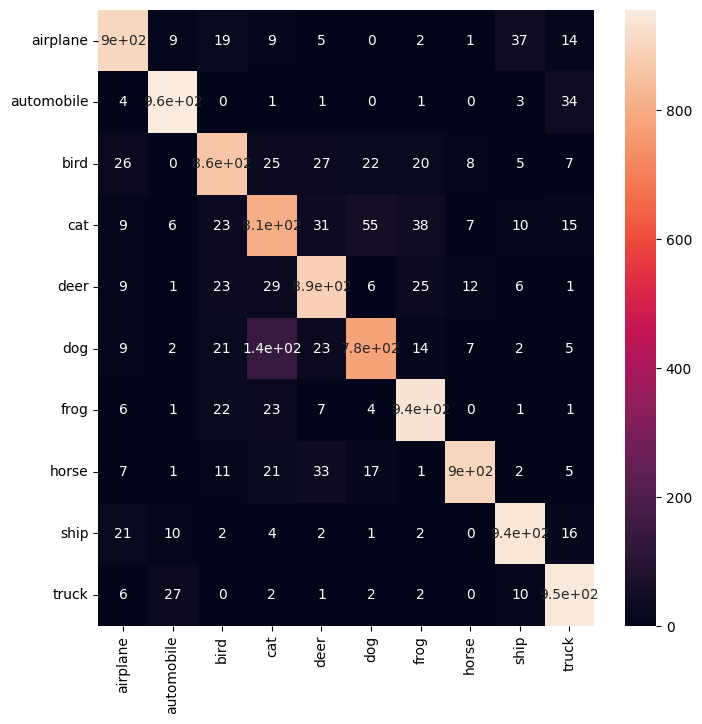

In [ ]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
predictions_for_cm = predictions.argmax(1)
cm = confusion_matrix(test_Y.argmax(1),predictions_for_cm)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True,  xticklabels=class_names, yticklabels = class_names)

In [ ]:
model.save('/content/drive/MyDrive/Image_Classification/Image_Classification.h5')